# 

# Introduction
This project will interpret data from the National Parks Service about endangered species in different parks. For that purpose it will analyze data on the conservation statuses of the species and investigate if there are any patterns or themes to the types of species that become endangered. It will be necessary to analyze, clean up, and plot data as well as pose questions and answer them.

## Goals for the project
Some questions to answer with the analysis are: 

1. What is the distribution of conservation_status for animals?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which species were spotted the most at each park?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let's take a look at what type of information are we dealing with.

In [2]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
observations = observations.rename(columns={'observations': 'species_observations'})
observations.head()

,scientific_name,park_name,species_observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Conservation Status

In [4]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


We can see here that we only have 191 rows for the column 'conservation_status', which means, that the rest of rows are missing. In order to analyze the distribution of the conservation status of the animals, it will be better to make a new data set (without changing the original) to remove all of the rows with missing values.

In [5]:
species_info.count()

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [6]:
species_info.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [7]:
species_info_clean = species_info.dropna(subset=['conservation_status'])
species_info_clean.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


In [8]:
unique_conservation_values_list = species_info_clean['conservation_status'].unique().tolist()
unique_conservation_values_list

['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']

As we can see in the plot bellow, most of the species are in concern, up to 160. Almost 20 are endangered and a few in recovery.

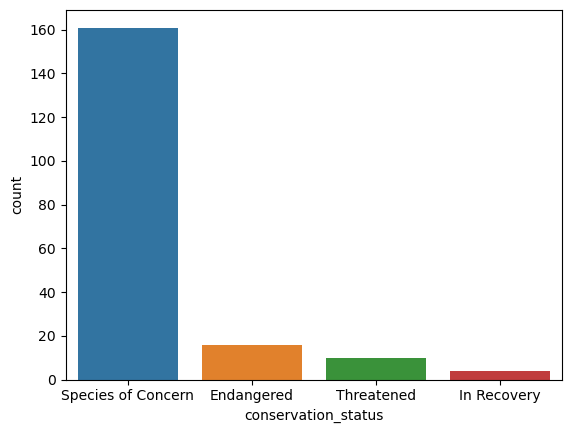

In [9]:
sns.countplot(x='conservation_status', data=species_info_clean)
plt.savefig(r'C:\Users\mary9\Desktop\CURSOS\AI\Data Scientist-Machine Learning\your_chart_name.png')
plt.show()

In order to know if certain types of species are more likely to be endangered, we will have to check what species are endangered and check the distribution.

In [10]:
endangered_species = species_info_clean[species_info_clean['conservation_status'] == 'Endangered']
endangered_list = endangered_species['common_names'].tolist()
print("Endangered Species:")
for species in endangered_list:
    print(f"- {species}")

Endangered Species:
- Gray Wolf
- Red Wolf
- Gray Myotis
- Indiana Bat, Indiana Or Social Myotis
- Carolina Northern Flying Squirrel, Northern Flying Squirrel
- Whooping Crane
- Bachman's Warbler, Bachman's Wood Warbler
- Red-Cockaded Woodpecker
- Duskytail Darter
- Smoky Madtom
- Mountain Avens, Spreading Avens
- June Sucker
- Sierra Nevada Bighorn Sheep
- Gray Wolf, Wolf
- California Condor
- Sierra Nevada Yellow-Legged Frog


In [11]:
endangered_count = len(endangered_list)
print(f"\nTotal number of endangered species: {endangered_count}")


Total number of endangered species: 16


### Status significance

Are the differences between species and their conservation status significant?

In [12]:
endangered_category = species_info_clean[species_info_clean['conservation_status'] == 'Endangered']
endangered_category_set = set(endangered_category['category'])
print("Endangered Categories:")
for cat in endangered_category_set:
    print(f"- {cat}")

Endangered Categories:
- Fish
- Mammal
- Vascular Plant
- Bird
- Amphibian


In [13]:
endangered_category_counts = endangered_category['category'].value_counts()
print("Endangered Categories (with counts):")
for cat, count in endangered_category_counts.items():
    print(f"- {cat}: {count}")

Endangered Categories (with counts):
- Mammal: 7
- Bird: 4
- Fish: 3
- Vascular Plant: 1
- Amphibian: 1


In [14]:
from scipy.stats import chi2_contingency

merged_df = pd.merge(observations, species_info, on='scientific_name')

merged_df = merged_df.dropna(subset=['conservation_status'])

contingency_table = pd.crosstab(merged_df['category'], merged_df['conservation_status'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")

alpha = 0.05
if p_value < alpha:
    print("The differences between species categories and their conservation status are statistically significant.")
else:
    print("There is not enough evidence to conclude that the differences between species categories and their conservation status are statistically significant.")

Chi-squared statistic: 281.6928573184134
p-value: 2.7594442674479634e-49
Degrees of freedom: 18
The differences between species categories and their conservation status are statistically significant.


### Which species were spotted the most at each park?

In [15]:
print(observations['park_name'].dtype)

object


In [16]:
observations['park_name'] = observations['park_name'].astype(str)

In [17]:
print(observations['park_name'].isnull().sum())

0


In [18]:
print(observations.columns)

Index(['scientific_name', 'park_name', 'species_observations'], dtype='object')


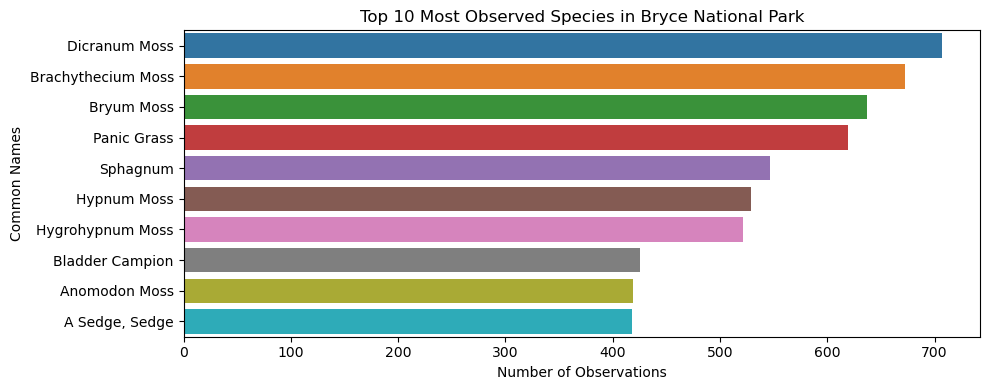

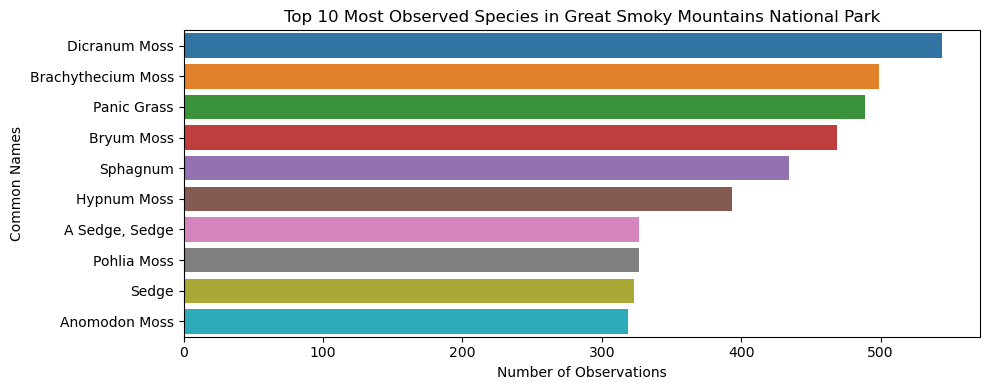

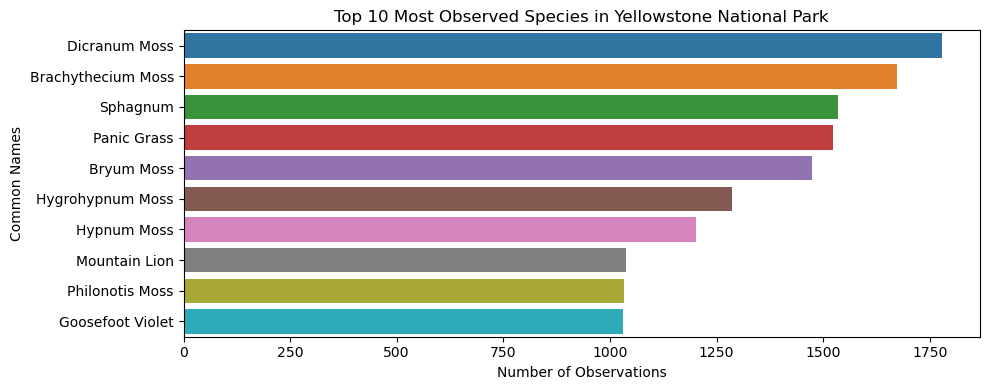

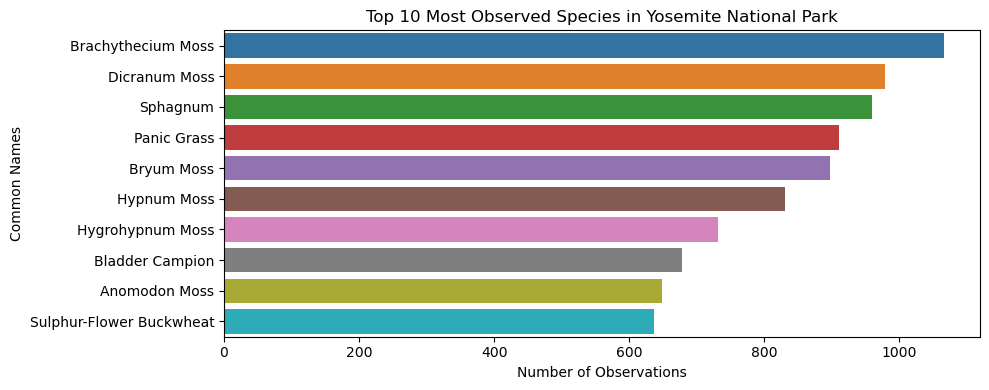

In [40]:
observations_merged = observations.merge(species_info[['scientific_name', 'common_names']], on='scientific_name', how='left')

observations_grouped = observations_merged.groupby(['park_name', 'common_names'])['species_observations'].sum().reset_index()

parks = observations_grouped['park_name'].unique()

for park in parks:
    park_data = observations_grouped[observations_grouped['park_name'] == park].sort_values('species_observations', ascending=False).head(10)
    
    plt.figure(figsize=(10, 4))
    sns.barplot(x='species_observations', y='common_names', data=park_data)
    plt.title(f'Top 10 Most Observed Species in {park}')
    plt.xlabel('Number of Observations')
    plt.ylabel('Common Names')
    plt.tight_layout()
    plt.show()

As we can see, the two most ovserved species in all parks are the "Brachythecium Moss" and the "Dicran Moss".

## Conclusions

1. From the 5824 species in the parks, only 191 are classified by its conservation status. From the other species we don't have data to make any conclusions. We do not know the reason of the missing data. Could be because those species are not endangered at all or just because they haven't been classified for any random reason.
2. There are a total of 16 endangered species and a lot more (160 more or less) in concern. And only a few in recovery. 
3. Most of the species endangered are Mammals.
4. The most observed species in all parks are "Brachythecium Moss" and the "Dicran Moss". But the most observed one was the Dicran Moss in the Yellowstone Park.